# Importing all the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore') #just to remove warning after code

# Data Wrangling

In [3]:
train_data = pd.read_excel(r"F:\carreer\flight_price_capstone\Data_Train.xlsx") #Loading the data using pandas

# here put r i.e appeding the string if not then it will be treated as escape character

In [4]:
train_data.head() #just to check through the data 

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
train_data.info() #getting info about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
train_data.isnull().sum() 

#just to get the null or nan value from each column

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [7]:
train_data.shape 

#Just to know rows and column present in data

(10683, 11)

In [8]:
# know we will get all the rows where we have the missing values

train_data[train_data['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


# As we have only one one missing values in same row, So we can drop the row

In [9]:
train_data.dropna(inplace=True)

In [10]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

# Pre-process and perform Featurization of "Date_of_Journey"

In [11]:
# here we have to process and extract month ,day , year from "Data_of _Journey" feature

data=train_data.copy() #creating a copy

In [12]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [137]:
data.dtypes

Airline                  int64
Destination              int64
Total_Stops              int64
Price                  float64
journey_day              int64
journey_month            int64
Dep_Time_hour            int64
Dep_Time_minute          int64
Arrival_Time_hour        int64
Arrival_Time_minute      int64
Duration_hours           int64
Duration_mins            int64
Source_Banglore          int64
Source_Kolkata           int64
Source_Delhi             int64
Source_Chennai           int64
Source_Mumbai            int64
dtype: object

Here we see that the Date_of_Journey is object data_type,
So, we have to covert this datatype into time-stamp because our model will
not be able to understand values, it just understand time-stamp

So using pandas to_datetime to convert object datatype to datetime dtype.

In [14]:
# Creating user define fuct for datetime

def change_datetime(col):
    data[col]=pd.to_datetime(data[col])

In [15]:
data.columns # to get all column names

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [16]:
for feature in ['Date_of_Journey','Dep_Time','Arrival_Time']:
    change_datetime(feature)
    
# Just converting column to datetime in one go
# here note for time col it assign todays dont no why its some pandas issue think so

In [17]:
data.dtypes 

#so we converted its type from object to datetime format as we see

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [18]:
data['Date_of_Journey'].min()

Timestamp('2019-01-03 00:00:00')

In [19]:
data['Date_of_Journey'].max()

Timestamp('2019-12-06 00:00:00')

It means our data belongs to 2019 year only, hence extracting year features & cosidering this as 
input to my machine learning model is of no use. But if it would be more than one year
then it might have impacted.

# Lets do Feature Engineering of "Date_of_Journey" & get month, day & year 

In [20]:
data['journey_day'] = data['Date_of_Journey'].dt.day #adding day column

In [21]:
data['journey_month'] = data['Date_of_Journey'].dt.month #adding month column

In [22]:
data['journey_year'] = data['Date_of_Journey'].dt.year #adding year column

In [23]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2023-03-18 22:20:00,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-03-18 05:50:00,2023-03-18 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019


In [24]:
# as we created day month & year column so we can drop Date_of_Journey col

data.drop('Date_of_Journey', axis=1, inplace=True)

In [25]:
data.head(2)

#sucessfully drop Date_of_Journey col

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year
0,IndiGo,Banglore,New Delhi,BLR → DEL,2023-03-18 22:20:00,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-03-18 05:50:00,2023-03-18 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019


# Lets try to clean Dep_time & Arrival_time & featurize it

In [26]:
# Creating user define fuction to get time into hour and min

def extract_time(df,col):
    df[col+'_hour']=df[col].dt.hour
    df[col+'_minute']=df[col].dt.minute
    df.drop(col,axis=1,inplace=True) #as we will get min and hour col added so it would be of no use

In [27]:
# departure time is when the plane leaves from start of destination

extract_time(data,'Dep_Time')

In [28]:
data.head(1)

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20


In [29]:
# lets feature arrival time

extract_time(data,'Arrival_Time')

In [30]:
data.head(1)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10


# Lets analyse when will most of the flight take off

In [31]:
# converting flight dep_time into proper time i.e mid_night, moring, afternoon and eveninng

def flight_dep_time(x):
    '''
    This fuction will take flight Departure time
    and convert into appropriate format.
    
    '''
    if ( x>4 ) and (x<=8):
        return 'Early Morning'
    
    elif ( x>8 ) and ( x<=12 ):
        return 'Morning'
    
    elif ( x>12 ) and ( x<=16 ):
        return 'Afternoon'
    
    elif ( x>16 ) and ( x<=20 ):
        return 'Evening'
    
    elif ( x>20 ) and ( x<=24 ):
        return 'Night'
    else:
        return 'Late Night'

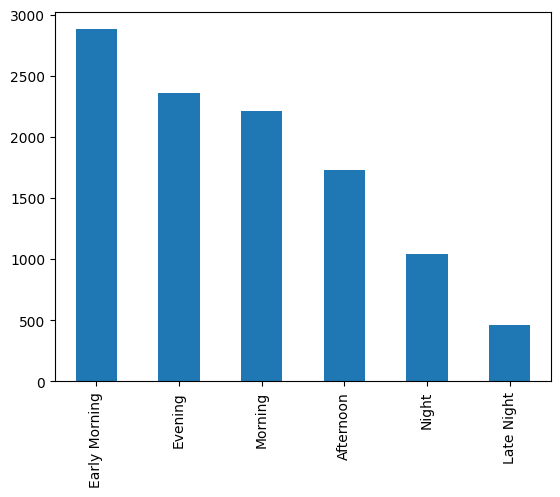

In [32]:
data['Dep_Time_hour'].apply(flight_dep_time).value_counts().plot(kind='bar'); # bar chart

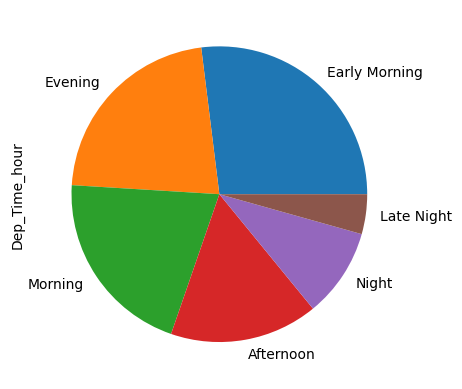

In [33]:
data['Dep_Time_hour'].apply(flight_dep_time).value_counts().plot(kind='pie'); #pie chart

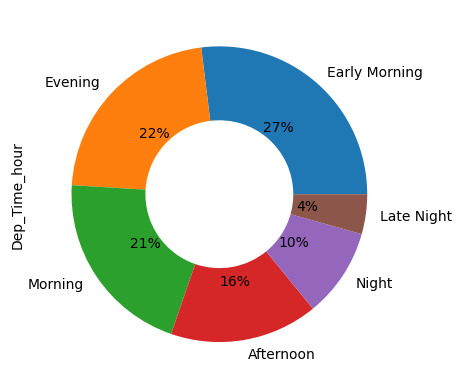

In [34]:
data['Dep_Time_hour'].apply(flight_dep_time).value_counts().plot(kind='pie',autopct='%.0f%%',
        explode = None , wedgeprops=dict(width= .5)); # donut plot

# Lets use Ploty to make interactive plots

In [35]:
#necessary import of libraries for Plotly and cufflinks

import plotly
import plotly.express
import cufflinks as cf
from cufflinks.offline import go_offline
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot

In [36]:
cf.go_offline() # if not run chart studio occurs to go_offlie

In [37]:
data['Dep_Time_hour'].apply(flight_dep_time).value_counts().iplot(kind='bar',yTitle='No of people' , xTitle='Arrival'); # bar chart

In [38]:
data['Dep_Time_hour'].apply(flight_dep_time).value_counts().iplot(kind='barh', color = 'blue',yTitle='No of people' , xTitle='Arrival')#pie chart

In [39]:
data['Dep_Time_hour'].apply(flight_dep_time).value_counts().iplot(kind='area',yTitle='No of people' , xTitle='Arrival')#pie chart

In [40]:
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,2019,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,2019,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,2019,16,50,21,35


# Pre-process Duration Feature & extract meaningful features

Lets Apply pre-processing on duration column,

-> Once we pre-process our Duration feature, lets featurize this feature & extract 
   Duration hours and minutes from duration
   
-> As my ML model is not able to understand this duration as it contains 
   string values , thats why we have to tell our ML model that this is
   Duration_hour and this is Duration_minute

In [41]:
# creating user def func for duration

def prepro_duration(x):
    if 'h' not in x:
        x='0h '+ x
    elif 'm' not in x:
        x=x+' 0m '
    return x


In [42]:
data['Duration'] = data['Duration'].apply(prepro_duration) # storing in string

In [43]:
data['Duration']

0         2h 50m
1         7h 25m
2        19h 0m 
3         5h 25m
4         4h 45m
          ...   
10678     2h 30m
10679     2h 35m
10680     3h 0m 
10681     2h 40m
10682     8h 20m
Name: Duration, Length: 10682, dtype: object

In [44]:
data['Duration'][0].split(' ')[0]

'2h'

In [45]:
int(data['Duration'][0].split(' ')[0][0:-1])

2

In [46]:
int(data['Duration'][0].split(' ')[1][0:-1])

50

In [47]:
data['Duration_hours']= data['Duration'].apply(lambda x:int(x.split(' ')[0][0:-1]))

In [48]:
data['Duration_mins']= data['Duration'].apply(lambda x:int(x.split(' ')[1][0:-1]))

In [49]:
data.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15,7,25


# Lets Analyse that Duration impacts on Price or not ?

In [50]:
# Eval is an inbuilt func of python which evaluates the "string" like python expression and return result as integer

eval('2*20+50*2') 

# Note without eval it will just print it as a string

140

In [51]:
# data['Duration_total_mins']=data.apply(eval)['Duration'].str.replace('h','*60').str.replace(' ','+').str.replace('m','*1')

In [52]:
# as previous was not working

data['Duration_total_mins']=data['Duration_hours']*60+data['Duration_mins']*1

In [53]:
data.head(1)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50,170


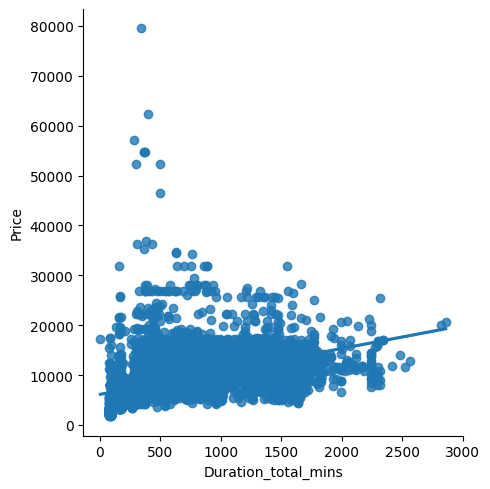

In [54]:
# it is the extended form of scatter plot

sns.lmplot(x='Duration_total_mins' , y='Price' , data=data);

# Conclusion

As the duration of minutes increases Flight price also increases

# Which city has maximum final destination of Flights?

In [55]:
data['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

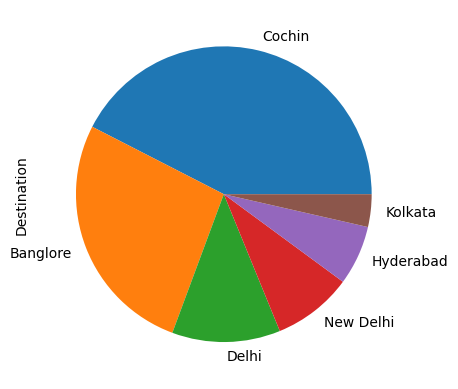

In [56]:
data['Destination'].value_counts().plot(kind='pie');

# Conclusion
Here as we see Final destination of majority of flight is Cochin. 

Also There are two values for delhi which needs to be corrected

# Lets perform Exploratory Data Analysis(Bivariate Analysis) to come up with some Business insights

Problem statement = On which route Jet Airways is Exteremely used?

In [57]:
data['Route']

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [58]:
data[data['Airline']=='Jet Airways'].groupby('Route').size().sort_values(ascending=False)

Route
CCU → BOM → BLR          930
DEL → BOM → COK          875
BLR → BOM → DEL          385
BLR → DEL                382
CCU → DEL → BLR          300
BOM → HYD                207
DEL → JAI → BOM → COK    207
DEL → AMD → BOM → COK    141
DEL → IDR → BOM → COK     86
DEL → NAG → BOM → COK     61
DEL → ATQ → BOM → COK     38
DEL → COK                 34
DEL → BHO → BOM → COK     29
DEL → BDQ → BOM → COK     28
DEL → LKO → BOM → COK     25
DEL → JDH → BOM → COK     23
CCU → GAU → BLR           22
DEL → MAA → BOM → COK     16
DEL → IXC → BOM → COK     13
BLR → MAA → DEL           10
BLR → BDQ → DEL            8
DEL → UDR → BOM → COK      7
BOM → DEL → HYD            5
CCU → BOM → PNQ → BLR      4
BLR → BOM → JDH → DEL      3
DEL → DED → BOM → COK      2
BOM → BDQ → DEL → HYD      2
DEL → CCU → BOM → COK      1
BOM → VNS → DEL → HYD      1
BOM → UDR → DEL → HYD      1
BOM → JDH → DEL → HYD      1
BOM → IDR → DEL → HYD      1
BOM → DED → DEL → HYD      1
dtype: int64

# Airline vs Price Analysis

    finding price distribution & summary of each airline

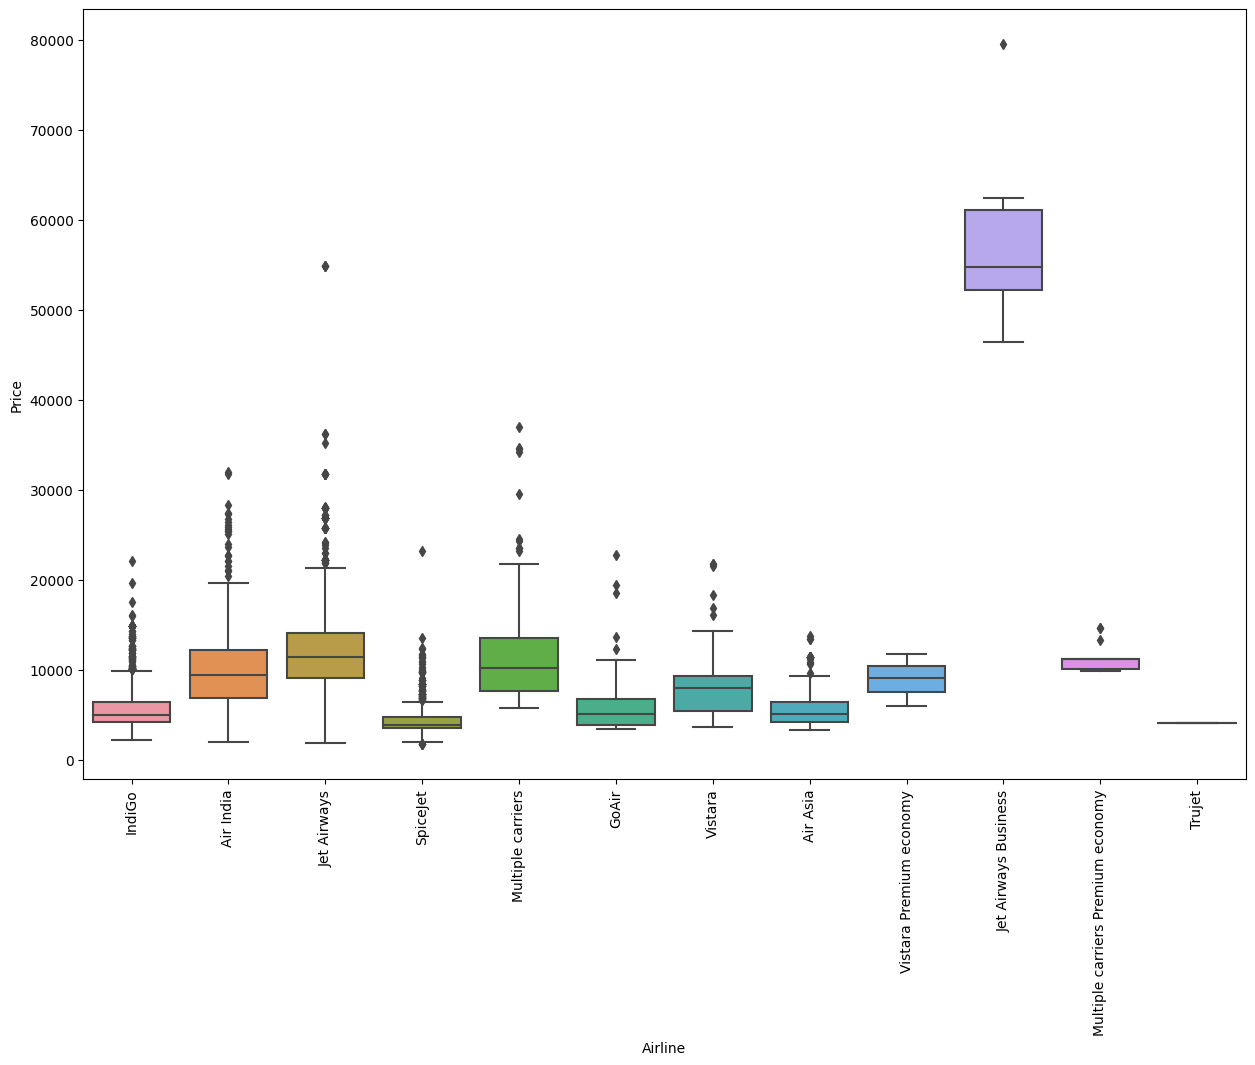

In [59]:
plt.figure(figsize=(15,10))
sns.boxplot(y='Price', x='Airline',data=data)
plt.xticks(rotation='vertical');

# Conclusion
By seeing the Graph, we can see that Jet Airways Business have the Highest Price.
We also see Indigo and spicejet Bit of lower compare to other Airline
and remaining Airline have have almost similar median


# Lets Perform feature-encoding on Data

Applying one-hot encoding on data

In [60]:
#Before that lets remove some of the unnecessary features

In [61]:
data.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15,7,25,445


In [62]:
np.round(data.Additional_Info.value_counts()/len(data)*100,2)

# get value count in the percentage

No info                         78.11
In-flight meal not included     18.55
No check-in baggage included     3.00
1 Long layover                   0.18
Change airports                  0.07
Business class                   0.04
No Info                          0.03
1 Short layover                  0.01
Red-eye flight                   0.01
2 Long layover                   0.01
Name: Additional_Info, dtype: float64

In [63]:
# here as Additional_info col has No info so it is of no use so can drop it
# Also we can drop Drop Route as well. As we have pre-process that column
# lets drop Duration_total_min as we have already extracted duration hour and duration min
# As data is of year 2019 itself so we can drop this column too

data.drop(columns=['Additional_Info','Route','Duration_total_mins','journey_year'], axis=1 , inplace=True)

In [64]:
data.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,7h 25m,2 stops,7662,5,1,5,50,13,15,7,25


# Lets seperate the categorical & numerical data

In [65]:
cat_col = [col for col in data.columns if data[col].dtypes=='object']
cat_col

['Airline', 'Source', 'Destination', 'Duration', 'Total_Stops']

In [66]:
num_col = [col for col in data.columns if data[col].dtypes!='object']
num_col

['Price',
 'journey_day',
 'journey_month',
 'Dep_Time_hour',
 'Dep_Time_minute',
 'Arrival_Time_hour',
 'Arrival_Time_minute',
 'Duration_hours',
 'Duration_mins']

# Handling the Categorical Data

one hot encoding- data not in order(Nominal data)

label encoding- data in order(Ordinal)

# lets perform label encoding for fun

In [67]:
data['Source'] .unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [68]:
data['Source']

0        Banglore
1         Kolkata
2           Delhi
3         Kolkata
4        Banglore
           ...   
10678     Kolkata
10679     Kolkata
10680    Banglore
10681    Banglore
10682       Delhi
Name: Source, Length: 10682, dtype: object

In [69]:
data['Source'].apply(lambda x:1 if x=='Banglore' else 0) 

0        1
1        0
2        0
3        0
4        1
        ..
10678    0
10679    0
10680    1
10681    1
10682    0
Name: Source, Length: 10682, dtype: int64

In [70]:
# just for one hot encoding

for category in data['Source'] .unique():
    data['Source_'+category]=data['Source'].apply(lambda x:1 if x==category else 0) 

In [71]:
data.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,Air India,Kolkata,Banglore,7h 25m,2 stops,7662,5,1,5,50,13,15,7,25,0,1,0,0,0


In [72]:
# here we see for different diff sources we got the separate columns this is nothing but a one hot encoding

# Target Guided mean encoding

we can do one hot encoding but if we have more sub-categories it creates dimentionality in ML

lets use target guided encoding to get rid of this prolem

In [73]:
airlines = data.groupby(['Airline'])['Price'].mean().sort_values().index
airlines

Index(['Trujet', 'SpiceJet', 'Air Asia', 'IndiGo', 'GoAir', 'Vistara',
       'Vistara Premium economy', 'Air India', 'Multiple carriers',
       'Multiple carriers Premium economy', 'Jet Airways',
       'Jet Airways Business'],
      dtype='object', name='Airline')

In [74]:
dict = {key:index for index,key in enumerate(airlines,0)}

In [75]:
dict

{'Trujet': 0,
 'SpiceJet': 1,
 'Air Asia': 2,
 'IndiGo': 3,
 'GoAir': 4,
 'Vistara': 5,
 'Vistara Premium economy': 6,
 'Air India': 7,
 'Multiple carriers': 8,
 'Multiple carriers Premium economy': 9,
 'Jet Airways': 10,
 'Jet Airways Business': 11}

In [76]:
data['Airline']=data['Airline'].map(dict)

In [77]:
data['Airline']

0         3
1         7
2        10
3         3
4         3
         ..
10678     2
10679     7
10680    10
10681     5
10682     7
Name: Airline, Length: 10682, dtype: int64

In [78]:
data.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,Banglore,New Delhi,2h 50m,non-stop,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,Kolkata,Banglore,7h 25m,2 stops,7662,5,1,5,50,13,15,7,25,0,1,0,0,0


In [79]:
data['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

 Note- Till know delhi has one airport as second one is in progress. So here we will consider new delhi & delhi same
 
 In future condition may change

In [80]:
data['Destination'].replace('New Delhi', 'Delhi', inplace=True)

In [81]:
data['Destination'].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [82]:
dest = data.groupby(['Destination'])['Price'].mean().sort_values().index
dest

Index(['Kolkata', 'Hyderabad', 'Delhi', 'Banglore', 'Cochin'], dtype='object', name='Destination')

In [83]:
dic1 = {key:index for index,key in enumerate(dest,0)}

In [84]:
dic1

{'Kolkata': 0, 'Hyderabad': 1, 'Delhi': 2, 'Banglore': 3, 'Cochin': 4}

In [85]:
 data['Destination']=data['Destination'].map(dic1)

In [86]:
data['Destination']

0        2
1        3
2        4
3        3
4        2
        ..
10678    3
10679    3
10680    2
10681    2
10682    4
Name: Destination, Length: 10682, dtype: int64

In [87]:
data.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,Banglore,2,2h 50m,non-stop,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,Kolkata,3,7h 25m,2 stops,7662,5,1,5,50,13,15,7,25,0,1,0,0,0


# performing Manual Encoding on Total_stops feature

In [88]:
data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [89]:
stops={'non-stop':0, '2 stops':1, '1 stop':2, '3 stops':3, '4 stops':4}

In [90]:
data['Total_Stops']=data['Total_Stops'].map(stops)

In [91]:
data['Total_Stops']

0        0
1        1
2        1
3        2
4        2
        ..
10678    0
10679    0
10680    0
10681    0
10682    1
Name: Total_Stops, Length: 10682, dtype: int64

# Performing the outlier Detection

Here the list of data visualization plot  to spot the outliers

1.Box and whisker plot(Box plot)
2.Scatter Plot
3.Histogram
4.Distribution plot
5.QQ plot

CAUSE FOR OUTLIERS
* Data Entry Errors - Human errors such as error caused during data collectio, recording or entry can cause outlier in data.
* Measurement Error - It is the most common source of outlier. This is caused when the measurement instrument used turn out to be faulty
* Natural Outlier - When an outlier is not artificial (due to error), it id a natural outlier. Most of real world data belong to this category.

In [92]:
def plot(df,col):
    fig,(ax1,ax2,ax3)=plt.subplots(3,1)
    sns.distplot(df[col],ax=ax1)
    sns.boxplot(df[col],ax=ax2)
    sns.distplot(df[col],ax=ax3,kde=False)

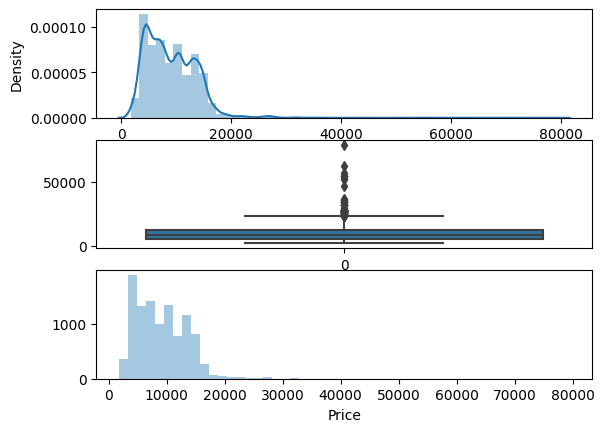

In [93]:
plot(data,'Price')

# Getting a high level overview of various ways to deal with outliers

Again there are various ways to deal with outliers :

1.Statistical imputation , i.e impute it with mean,meadian,mode of data

a. Whenever ur data is Gaussian Distributed, use 3 std dev approach to remove outliers in such case
    i.e we will use u+3*sigma & u-3*sigma
    data point greater than upper_boundary (U+3*sigma) are my outliers
    & data point less than lower_boundary (U-3*sigma) are my outliers
    
   Above approach is known as Z-score & it has a extended version known as Robust z-score..
   Robust 2-score is also called as Median absolute deviation method.
   It is similar to Z-score method with some changes in parameters.

b. If Features Are Skewed We Use the below Technique which is IQR
    Data which are greater than IQR +1.5 IQR and data which are below than IQR - 1.5 IQR are my outliers 
    where IQR=75th%ile data 25th%ile data

   & IQR +- 1.5 IQR will be changed depending upon the domain ie it may be IQR + 31QR

   Extended version of above is WINSORIZATION METHOD (PERCENTILE CAPPING)
            This method is similar to IQR method. It says -->>

   Data points that are greater than 99th percentile and data points that are below the 1st percentile
            are treated as outliers.

c..If we have huge high dimensional data, then it is good to perform isolation forest...
    It is a clustering algo which works based on decision tree and it isolate the outliers.
    It classify the data point to outlier and not outliers.. 
    If the result is -1, it means that this specific data point is an outlier.
    If the result is 1, then it means that the data point is not an outlier.

So we have tonnes of ways to deal with outliers...

In [94]:
data['Price' ]= np.where(data['Price']>=35000, data['Price'].median(),data['Price'])

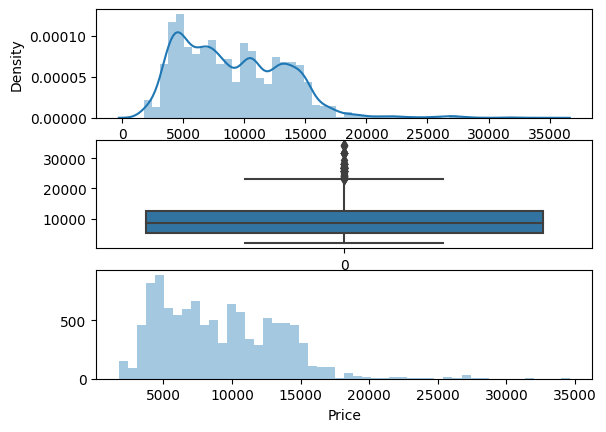

In [95]:
plot(data,'Price')

In [96]:
data.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,Banglore,2,2h 50m,0,3897.0,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,Kolkata,3,7h 25m,1,7662.0,5,1,5,50,13,15,7,25,0,1,0,0,0


In [97]:
data.drop(columns=['Source','Duration'], axis=1 , inplace=True)

In [98]:
data.head(2)

,Airline,Destination,Total_Stops,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,0,3897.0,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,3,1,7662.0,5,1,5,50,13,15,7,25,0,1,0,0,0


In [99]:
data.dtypes

Airline                  int64
Destination              int64
Total_Stops              int64
Price                  float64
journey_day              int64
journey_month            int64
Dep_Time_hour            int64
Dep_Time_minute          int64
Arrival_Time_hour        int64
Arrival_Time_minute      int64
Duration_hours           int64
Duration_mins            int64
Source_Banglore          int64
Source_Kolkata           int64
Source_Delhi             int64
Source_Chennai           int64
Source_Mumbai            int64
dtype: object

# Performing the feature selection

Finding out the best feature which will contribute most to the target variable. Lets get a high level overview of most of the frequently used feature selection technique..

Why to apply Feature Selection?

To select important features to get rid of curse of dimensionality ie.. to get rid of duplicate features

ways or technqiues to do it if we have regression use-case 

a..SelectKBest

   Score function:

   For regression: f_regression, mutual_info_regression

   f_regression
   Its backbone is pearson co-relation..

   mutual_info_regression
   Its Backbone is Various statistical test like Chi-sq, Anova & p-value.
   

b..ExtraTreesClassifier
    This technique gives you a score for each feature of your data, the higher the score more relevant it is

In [100]:
from sklearn.feature_selection import mutual_info_regression

In [101]:
X = data.drop(['Price'], axis=1)

In [102]:
y=data['Price']

In [103]:
X.dtypes

Airline                int64
Destination            int64
Total_Stops            int64
journey_day            int64
journey_month          int64
Dep_Time_hour          int64
Dep_Time_minute        int64
Arrival_Time_hour      int64
Arrival_Time_minute    int64
Duration_hours         int64
Duration_mins          int64
Source_Banglore        int64
Source_Kolkata         int64
Source_Delhi           int64
Source_Chennai         int64
Source_Mumbai          int64
dtype: object

In [104]:
mutual_info_regression(X,y)

array([0.97099008, 1.00472578, 0.78675646, 0.19801314, 0.23189044,
       0.33691397, 0.25944678, 0.40317021, 0.35268828, 0.47031311,
       0.33792504, 0.38368092, 0.45162002, 0.51055329, 0.1240444 ,
       0.20723004])

In [105]:
imp=pd.DataFrame(mutual_info_regression(X,y),index=X.columns)
imp.columns=['Importance']

In [106]:
imp.sort_values(by='Importance', ascending=False)

,Importance
Destination,1.002156
Airline,0.973063
Total_Stops,0.795920
Source_Delhi,0.526953
Duration_hours,0.468837
Source_Kolkata,0.453703
Arrival_Time_hour,0.401283
Source_Banglore,0.387483
Arrival_Time_minute,0.355365
Duration_mins,0.344840


# Lets build ML Model

#### Spliting the dataset into train & test

In [107]:
from sklearn.model_selection import train_test_split

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=42)

#### what we often do in modelling:

    a..Initially, lets build basic random forest model.

    b..then later-on, we will try to improve this model using some parameters..

    c..Then we will hyper-tune my model to get optimal value of parameters in order to achieve optimal value of params..

In [109]:
from sklearn.ensemble import RandomForestRegressor

In [110]:
ml_model=RandomForestRegressor()

In [111]:
model=ml_model.fit(X_train,y_train)

In [112]:
y_pred=model.predict(X_test)

In [113]:
y_pred

array([16653.1       ,  6284.74      ,  8851.1       , ...,
        6707.86      , 12501.31      , 13125.36997619])

In [114]:
y_pred.shape

(2137,)

In [115]:
len(X_test)

2137

### How to save ML model into disk

In [116]:
import pickle

In [117]:
file= open(r'F:\carreer\flight_price_capstone/rf_random2.pkl','wb')

#saving the model into the disk

In [118]:
pickle.dump(model,file)

In [119]:
model = open(r'F:\carreer\flight_price_capstone/rf_random2.pkl','rb')

# reading model for reuse

In [120]:
forest=pickle.load(model)

In [121]:
forest.predict(X_test)

array([16653.1       ,  6284.74      ,  8851.1       , ...,
        6707.86      , 12501.31      , 13125.36997619])

# Defining you own evaluation metrix:

In [122]:
def mape(y_true,y_pred):
    y_true,y_pred=np.array(y_true),np.array(y_pred)
    
    return np.mean(np.abs((y_true-y_pred)/y_true))*100

In [123]:
mape(y_test,forest.predict(X_test))

13.40450922441882

# Automate ML Pipeline :

In [124]:
def predict(ml_model):
    
    model=ml_model.fit(X_train,y_train) 
    print('Training score: {}'.format(model.score (X_train,y_train)))
    y_prediction = model.predict(X_test)
    print("Predictions are: {}".format(y_prediction))
    print('\n')

    from sklearn import metrics
    r2_score=metrics.r2_score (y_test,y_prediction)
    print('r2_score: {}'.format(r2_score))
    print('MSE : ', metrics.mean_squared_error(y_test,y_prediction))
    print('MAE : ', metrics.mean_absolute_error(y_test,y_prediction)) 
    print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test,y_prediction)))
    print('MAPE : ', mape(y_test,y_prediction))
    sns.distplot (y_test-y_prediction)
    

Training score: 0.9508875184685623
Predictions are: [16766.85        6340.86        8874.21       ...  6540.43
 12749.58145238 13416.88833333]


r2_score: 0.8049298156685952
MSE :  3927795.361022737
MAE :  1207.9168203646686
RMSE : 1981.866635528924
MAPE :  13.45232116188991


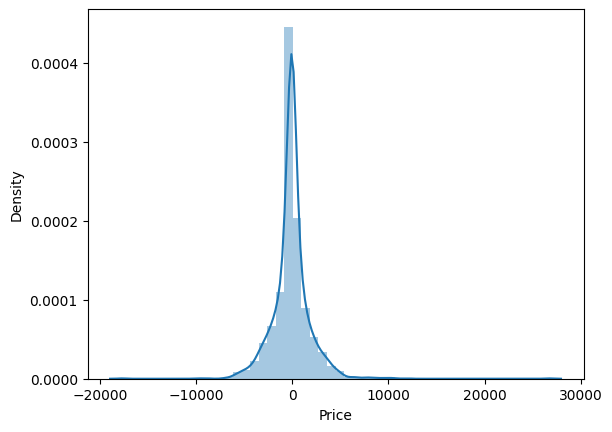

In [125]:
predict(RandomForestRegressor())

#### how to hypertune ml model

    Hyperparameter Tuning or Hyperparameter Optimization 
    1. Choose following method for hyperparameter tuning
        a. RandomizedSearchCV --> Fast way to Hypertune model 
        b.GridSearchCV--> Slow way to hypertune my model
    2. Choose ML algo that u have to hypertune
    3. Assign hyperparameters in form of dictionary or create hyper-parameter space
    4. Define searching & apply searching on Training data or Fit the CV model
    5. Check best parameters and best score

In [126]:
from sklearn.model_selection import RandomizedSearchCV

In [127]:
### initialize the estimator

reg_rf=RandomForestRegressor()

In [128]:
np.linspace(start=1000,stop=1200,num=6)

array([1000., 1040., 1080., 1120., 1160., 1200.])

In [129]:
# Number of trees in random forest

n_estimators = [int(x) for x in np.linspace(start=1800, stop=1208, num=6)]

# Number of features to consider at every split

max_features=["auto", "sqrt"]

# Maximum number of Levels in tree

max_depth=[int(x) for x in np.linspace (start=5, stop=30, num=4)]

# Minimum number of samples required to split a node 
min_samples_split=[5,10,15,100]

In [130]:
# Create the grid or hyper-parameter space 
random_grid={
    'n_estimators':n_estimators,
    'max_features' :max_features,
    'max_depth':max_depth,
    'min_samples_split': min_samples_split

}

In [131]:
random_grid

{'n_estimators': [1800, 1681, 1563, 1444, 1326, 1208],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [5, 13, 21, 30],
 'min_samples_split': [5, 10, 15, 100]}

In [132]:
rf_Random = RandomizedSearchCV(reg_rf,param_distributions=random_grid,cv=3,verbose=2,n_jobs=-1)

In [133]:
rf_Random.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 13, 21, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10, 15, 100],
                                        'n_estimators': [1800, 1681, 1563, 1444,
                                                         1326, 1208]},
                   verbose=2)

In [134]:
### to get the best model

rf_Random.best_params_

{'n_estimators': 1208,
 'min_samples_split': 5,
 'max_features': 'auto',
 'max_depth': 13}

In [135]:
pred2=rf_Random.predict(X_test)

In [136]:
from sklearn import metrics
metrics.r2_score(y_test,pred2)

0.8266270887857861